<a href="https://colab.research.google.com/github/kureo1111/Trainee/blob/main/Trainee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.26.4 pandas==2.2.2 scipy==1.13.1 statsmodels==0.14.2 pmdarima==2.0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install japanize-matplotlib

In [4]:
import japanize_matplotlib

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_price.csv')

In [6]:
df

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
...,...,...,...,...,...,...,...
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%


In [7]:
new_columns = {
    '日付け': 'date',
    '終値': 'closing_price',
    '始値': 'opening_price',
    '高値': 'high_price',
    '安値': 'low_price',
    '出来高': 'volume',
    '変化率 %': 'change_rate'
}

df.rename(columns=new_columns, inplace=True)

print(df.head())

         date  closing_price  opening_price  high_price  low_price   volume  \
0  2024-08-01          156.3          159.3       159.4      156.1   79.15M   
1  2024-07-31          160.4          158.2       160.7      158.1  173.91M   
2  2024-07-30          158.7          158.8       159.2      158.0  138.14M   
3  2024-07-29          159.7          158.7       160.2      158.4  126.28M   
4  2024-07-26          157.9          159.3       159.6      157.9  155.08M   

  change_rate  
0      -2.56%  
1       1.07%  
2      -0.63%  
3       1.14%  
4      -0.13%  


ところどころ日付が飛んでいる。まず、データの概要を知る。

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9202 non-null   object 
 1   closing_price  9202 non-null   float64
 2   opening_price  9202 non-null   float64
 3   high_price     9202 non-null   float64
 4   low_price      9202 non-null   float64
 5   volume         9202 non-null   object 
 6   change_rate    9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [9]:
df.isnull().sum()

,0
date,0
closing_price,0
opening_price,0
high_price,0
low_price,0
volume,0
change_rate,0


In [10]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           9202 non-null   datetime64[ns]
 1   closing_price  9202 non-null   float64       
 2   opening_price  9202 non-null   float64       
 3   high_price     9202 non-null   float64       
 4   low_price      9202 non-null   float64       
 5   volume         9202 non-null   object        
 6   change_rate    9202 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 503.4+ KB


In [12]:
df = df.sort_values(by='date')

In [13]:
df.index = df['date']
df.index.name = None

In [14]:
df.drop('date', axis=1, inplace=True)

In [15]:
df

,closing_price,opening_price,high_price,low_price,volume,change_rate
1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%
1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%
1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
...,...,...,...,...,...,...
2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%


objectデータを数値にする。また、単位を消して数値のみで表す。

In [16]:
def convert_volume_column(df):
  df = df.copy()
  if df['volume'].dtype == 'object':
    def parse_single_volume(vol_str):
      vol_str = str(vol_str).upper()

      if 'B' in vol_str:
        numeric_part = vol_str.replace('B', '')
        return float(numeric_part) * 1e9
      elif 'M' in vol_str:
        numeric_part = vol_str.replace('M', '')
        return float(numeric_part) * 1e6
      elif 'K' in vol_str:
        numeric_part = vol_str.replace('K', '')
        return float(numeric_part) * 1e3

  df['volume'] = df['volume'].apply(parse_single_volume)
  return df

In [17]:
df = convert_volume_column(df)

In [18]:
def convert_percentage_column(df):
  df = df.copy()
  if df['change_rate'].dtype == 'object':
    df['change_rate'] = df['change_rate'].str.replace('%', '')
    df['change_rate'] = pd.to_numeric(df['change_rate']) / 100
  return df

In [19]:
df = convert_percentage_column(df)

In [20]:
df

,closing_price,opening_price,high_price,low_price,volume,change_rate
1987-02-12,182.4,182.4,182.4,182.4,1.280000e+09,0.1625
1987-02-13,172.5,176.5,176.5,172.5,4.223800e+08,-0.0543
1987-02-16,175.5,166.7,175.5,165.7,3.605100e+08,0.0174
1987-02-17,182.4,176.5,184.3,175.5,8.815100e+08,0.0393
1987-02-18,191.2,186.3,191.2,186.3,7.950900e+08,0.0482
...,...,...,...,...,...,...
2024-07-26,157.9,159.3,159.6,157.9,1.550800e+08,-0.0013
2024-07-29,159.7,158.7,160.2,158.4,1.262800e+08,0.0114
2024-07-30,158.7,158.8,159.2,158.0,1.381400e+08,-0.0063
2024-07-31,160.4,158.2,160.7,158.1,1.739100e+08,0.0107


In [21]:
df.describe()

,closing_price,opening_price,high_price,low_price,volume,change_rate
count,9202.000000,9202.000000,9202.000000,9202.000000,9.202000e+03,9202.000000
mean,92.180961,92.256183,93.176451,91.330146,1.726677e+08,0.000175
std,50.452228,50.598215,51.049837,50.087405,1.251280e+08,0.018767
min,33.000000,33.000000,33.200000,32.200000,9.340000e+06,-0.147400
25%,52.000000,52.100000,52.800000,51.500000,8.073000e+07,-0.009400
50%,85.100000,85.100000,86.050000,84.200000,1.540150e+08,0.000000
75%,110.800000,110.800000,111.900000,109.275000,2.305225e+08,0.009000
max,305.900000,309.800000,311.800000,303.900000,1.280000e+09,0.162500


In [22]:
print(f"データ期間：{df.index.min()} ~ {df.index.max()}")
print(f"総データ数: {len(df)}")
print(f"期間: {(df.index.max() - df.index.min()).days}日")

データ期間：1987-02-12 00:00:00 ~ 2024-08-01 00:00:00
総データ数: 9202
期間: 13685日


おそらく、取引が行われていない土日などの期間。株価は、取引が行われた時のみ変動するため、前日のデータで補完することが多いが、ここでは単純に削除したものを使用する。

基本的な分析

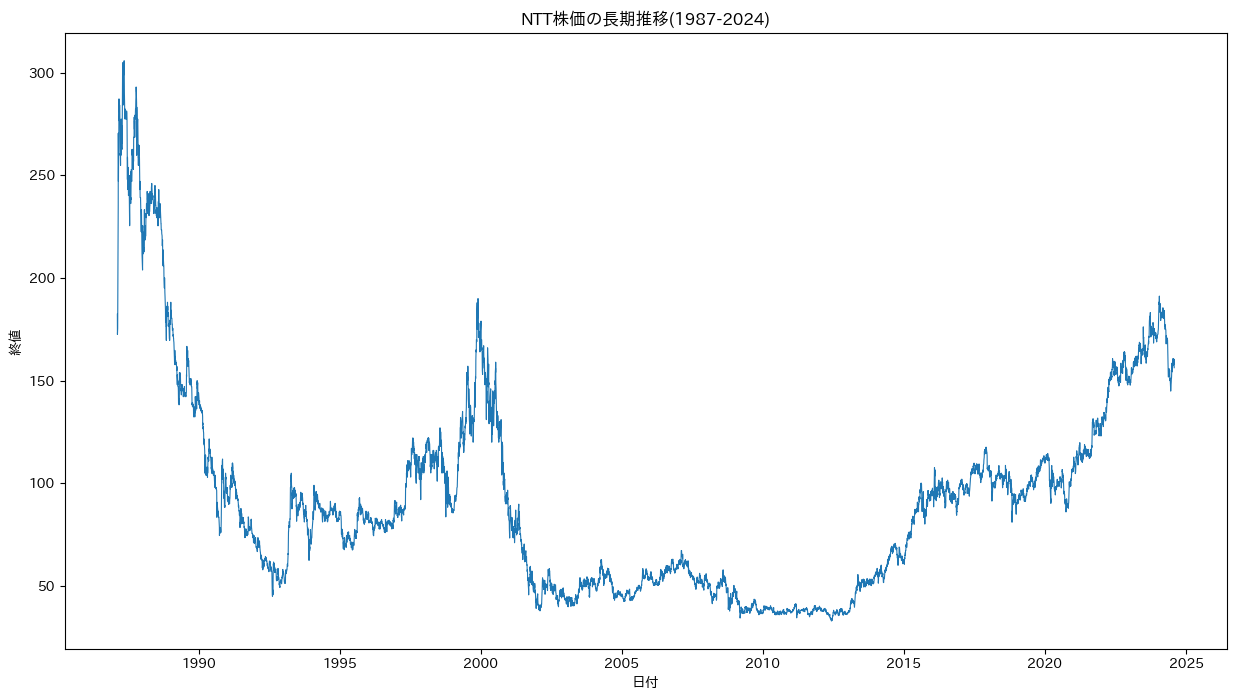

In [23]:
plt.figure(figsize=(15, 8))
plt.plot(df['closing_price'], linewidth=0.8)
plt.title('NTT株価の長期推移(1987-2024)')
plt.xlabel('日付')
plt.ylabel('終値')
plt.show()

リターン分析

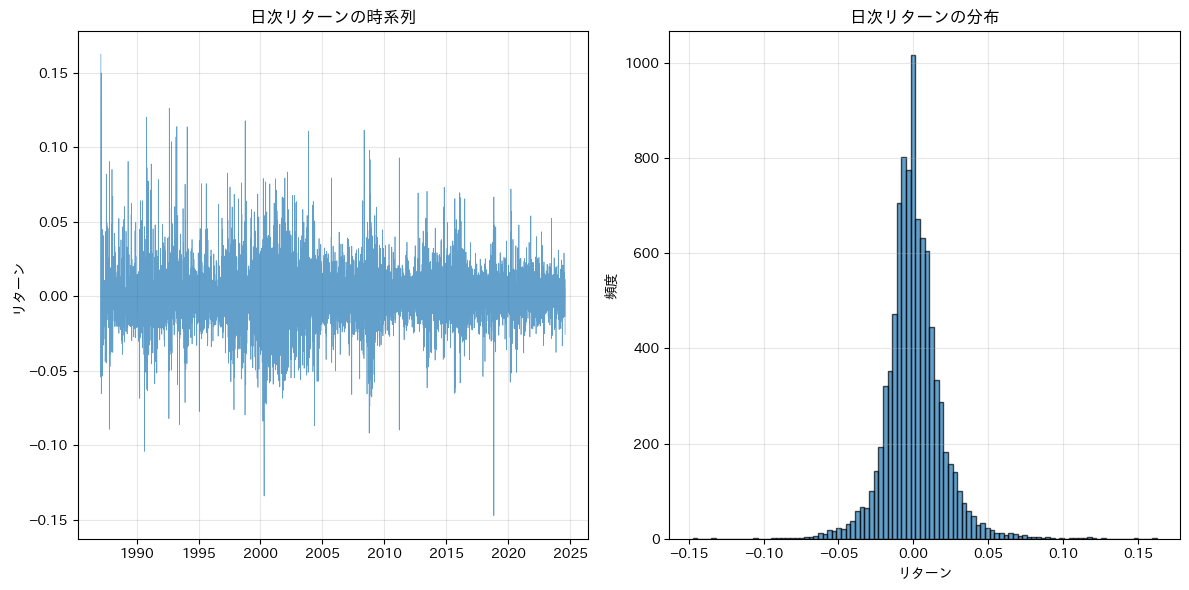

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['change_rate'], linewidth=0.5, alpha=0.7)
plt.title('日次リターンの時系列')
plt.ylabel('リターン')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(df['change_rate'], bins=100, alpha=0.7, edgecolor='black')
plt.title('日次リターンの分布')
plt.xlabel('リターン')
plt.ylabel('頻度')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

直近1年のOHLC分析

In [25]:
df.tail(247)

,closing_price,opening_price,high_price,low_price,volume,change_rate
2023-08-01,162.3,162.8,162.8,161.7,118100000.0,-0.0037
2023-08-02,160.3,161.0,161.8,160.1,151820000.0,-0.0123
2023-08-03,159.2,160.0,160.1,159.0,162790000.0,-0.0069
2023-08-04,158.5,159.7,160.1,157.6,155700000.0,-0.0044
2023-08-07,160.0,158.0,160.4,158.0,124130000.0,0.0095
...,...,...,...,...,...,...
2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.0013
2024-07-29,159.7,158.7,160.2,158.4,126280000.0,0.0114
2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.0063
2024-07-31,160.4,158.2,160.7,158.1,173910000.0,0.0107


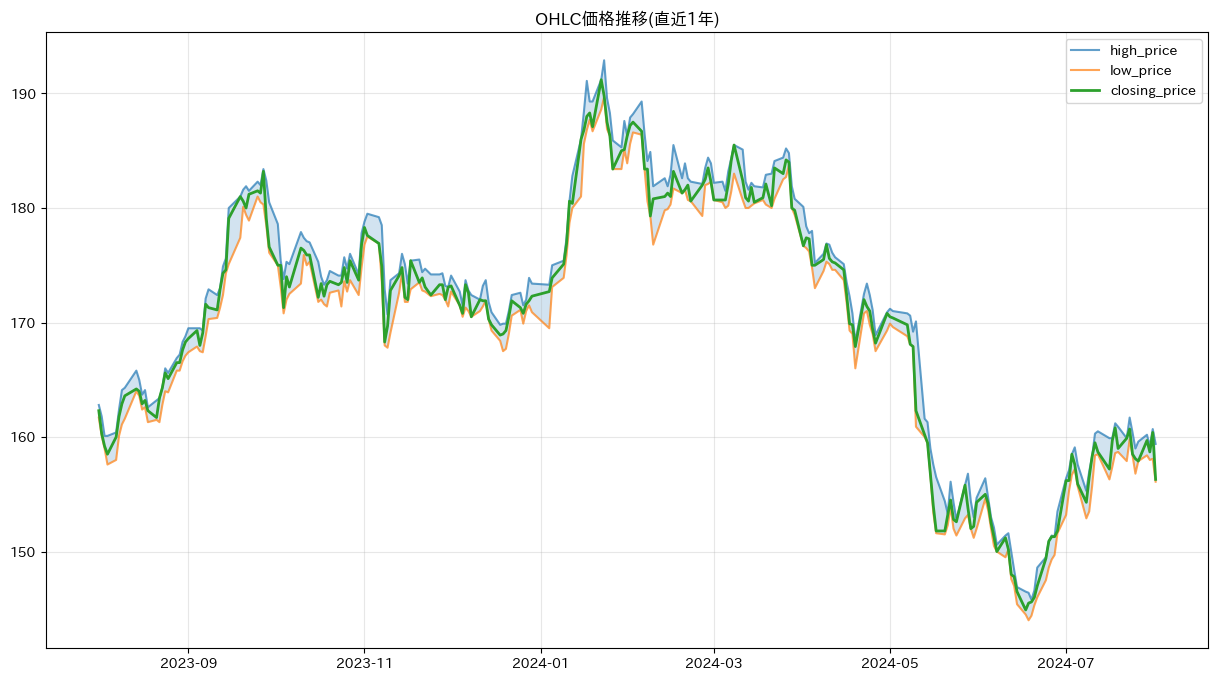

In [26]:
recent_data = df.tail(247)

plt.figure(figsize=(15, 8))
plt.plot(recent_data.index, recent_data['high_price'], label='high_price', alpha=0.7)
plt.plot(recent_data.index, recent_data['low_price'], label='low_price', alpha=0.7)
plt.plot(recent_data.index, recent_data['closing_price'], label='closing_price', linewidth=2)
plt.fill_between(recent_data.index, recent_data['high_price'], recent_data['low_price'], alpha=0.2)
plt.title('OHLC価格推移(直近1年)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

出来高分析

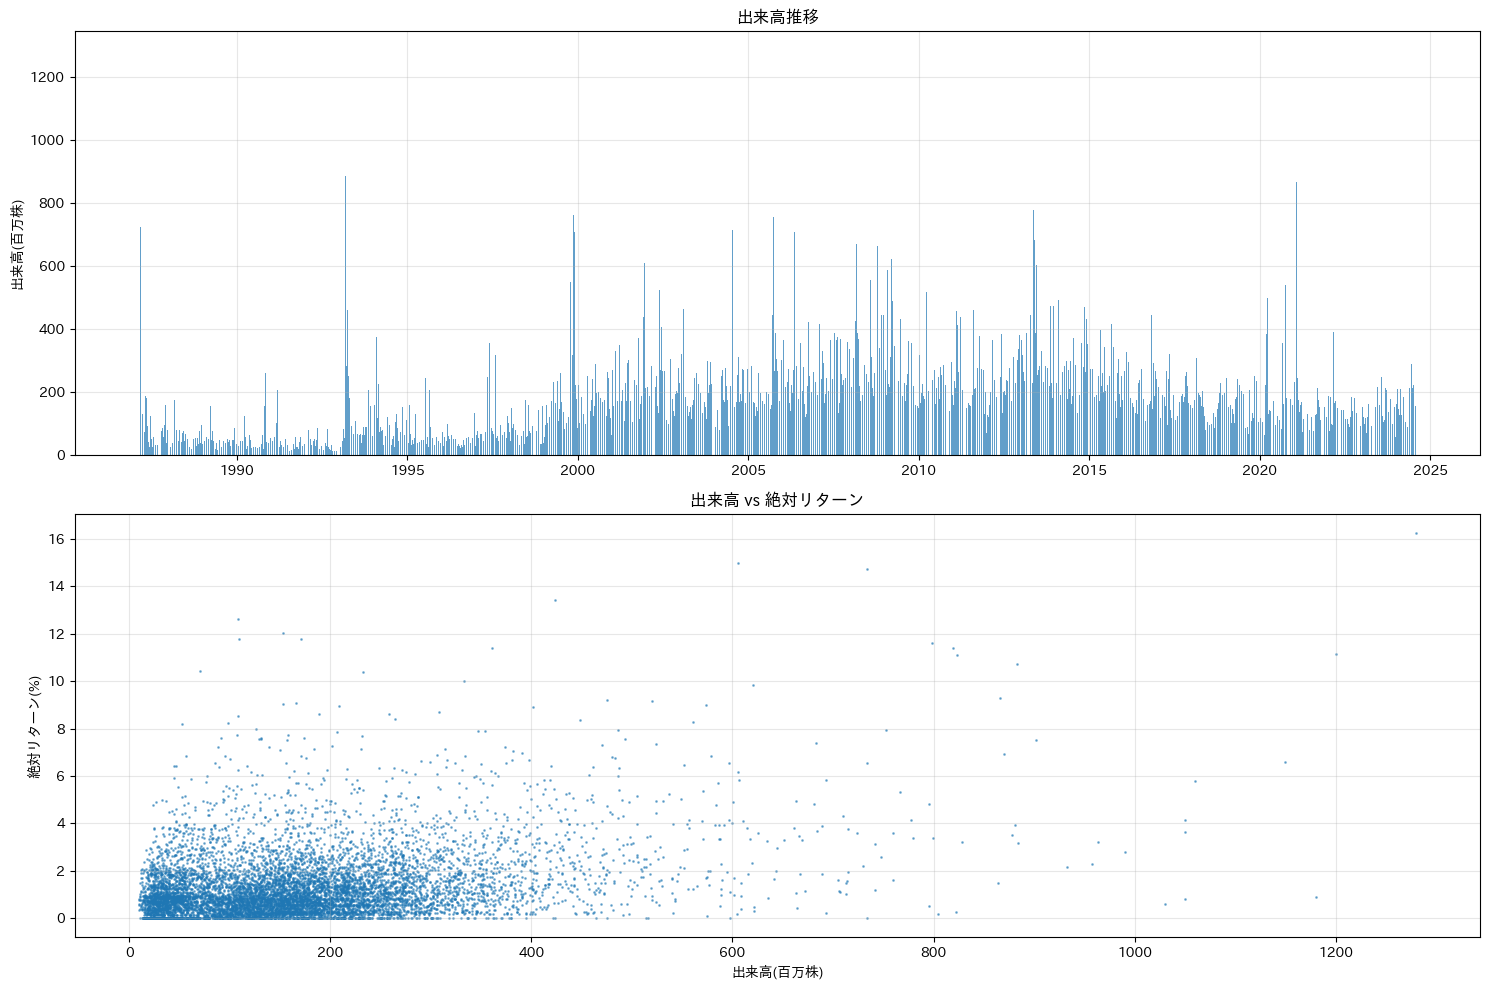

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].bar(df.index, df['volume'] / 1e6, width=1, alpha=0.7)
axes[0].set_title('出来高推移')
axes[0].set_ylabel('出来高(百万株)')
axes[0].grid(True, alpha=0.3)

abs_returns = abs(df['change_rate'] * 100)
axes[1].scatter(df['volume'] / 1e6, abs_returns, alpha=0.5, s=1)
axes[1].set_xlabel('出来高(百万株)')
axes[1].set_ylabel('絶対リターン(%)')
axes[1].set_title('出来高 vs 絶対リターン')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

STL分解を行う

In [28]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

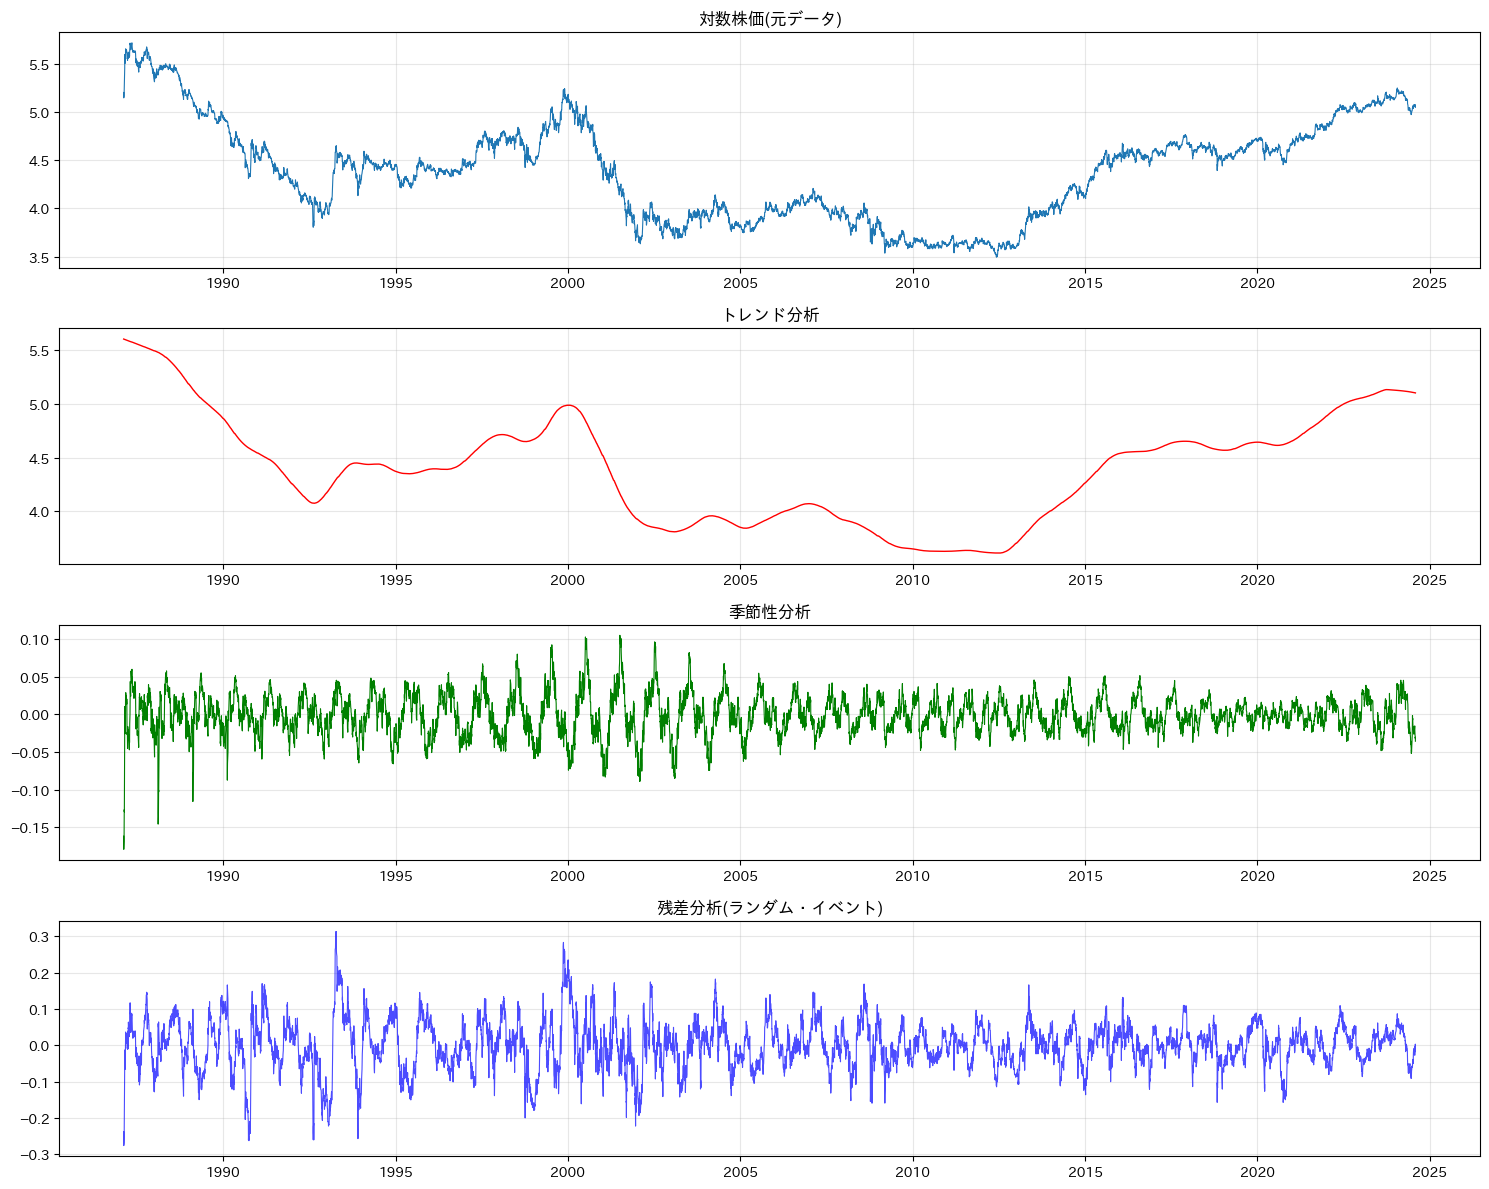

In [29]:
def perform_stl_decomposition(df):
  log_prices = np.log(df['closing_price'])

  stl = STL(log_prices, period=247, seasonal=13)
  res = stl.fit()

  fig, axes = plt.subplots(4, 1, figsize=(15, 12))

  axes[0].plot(df.index, log_prices, linewidth=0.8)
  axes[0].set_title('対数株価(元データ)')
  axes[0].grid(True, alpha=0.3)

  axes[1].plot(df.index, res.trend, linewidth=1, color='red')
  axes[1].set_title('トレンド分析')
  axes[1].grid(True, alpha=0.3)

  axes[2].plot(df.index, res.seasonal, linewidth=0.8, color='green')
  axes[2].set_title('季節性分析')
  axes[2].grid(True, alpha=0.3)

  axes[3].plot(df.index, res.resid, linewidth=0.8, color='blue', alpha=0.7)
  axes[3].set_title('残差分析(ランダム・イベント)')
  axes[3].grid(True, alpha=0.3)

  plt.tight_layout()
  plt.show()

  return res

stl_result = perform_stl_decomposition(df)

詳細分析

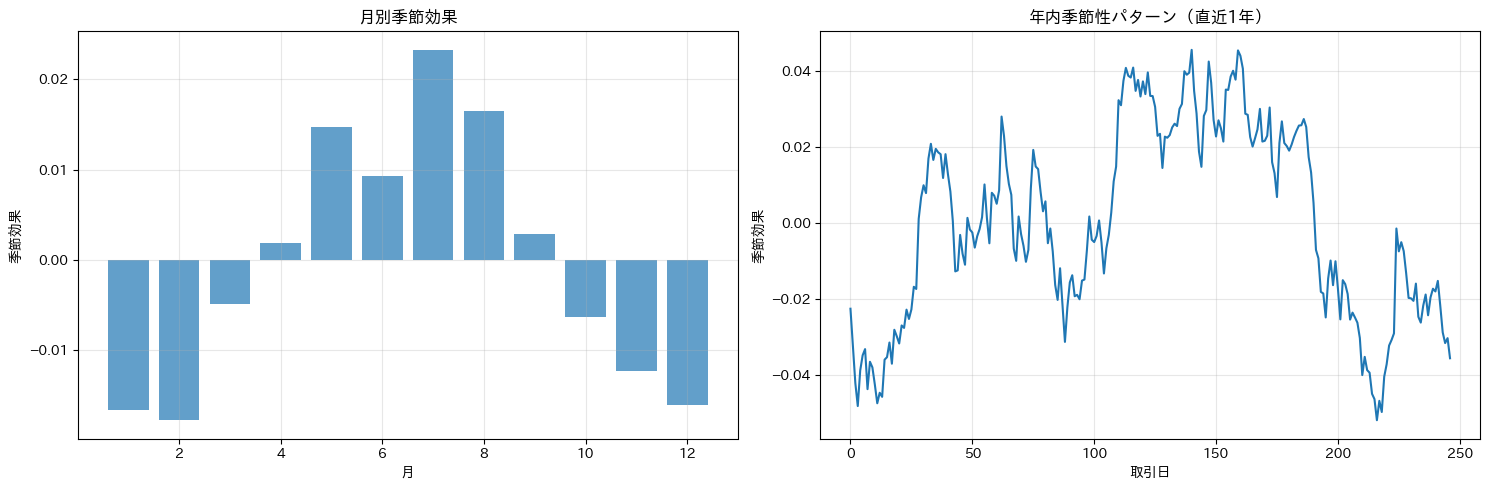

In [30]:
def analyze_seasonality(stl_result, df):

    df_analysis = df.copy()
    df_analysis['seasonal'] = stl_result.seasonal
    df_analysis['month'] = df_analysis.index.month

    monthly_seasonal = df_analysis.groupby('month')['seasonal'].mean()

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.bar(monthly_seasonal.index, monthly_seasonal.values, alpha=0.7)
    plt.title('月別季節効果')
    plt.xlabel('月')
    plt.ylabel('季節効果')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    recent_seasonal = stl_result.seasonal.tail(247)  #直近1年
    plt.plot(range(len(recent_seasonal)), recent_seasonal)
    plt.title('年内季節性パターン（直近1年）')
    plt.xlabel('取引日')
    plt.ylabel('季節効果')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return monthly_seasonal

monthly_effects = analyze_seasonality(stl_result, df)

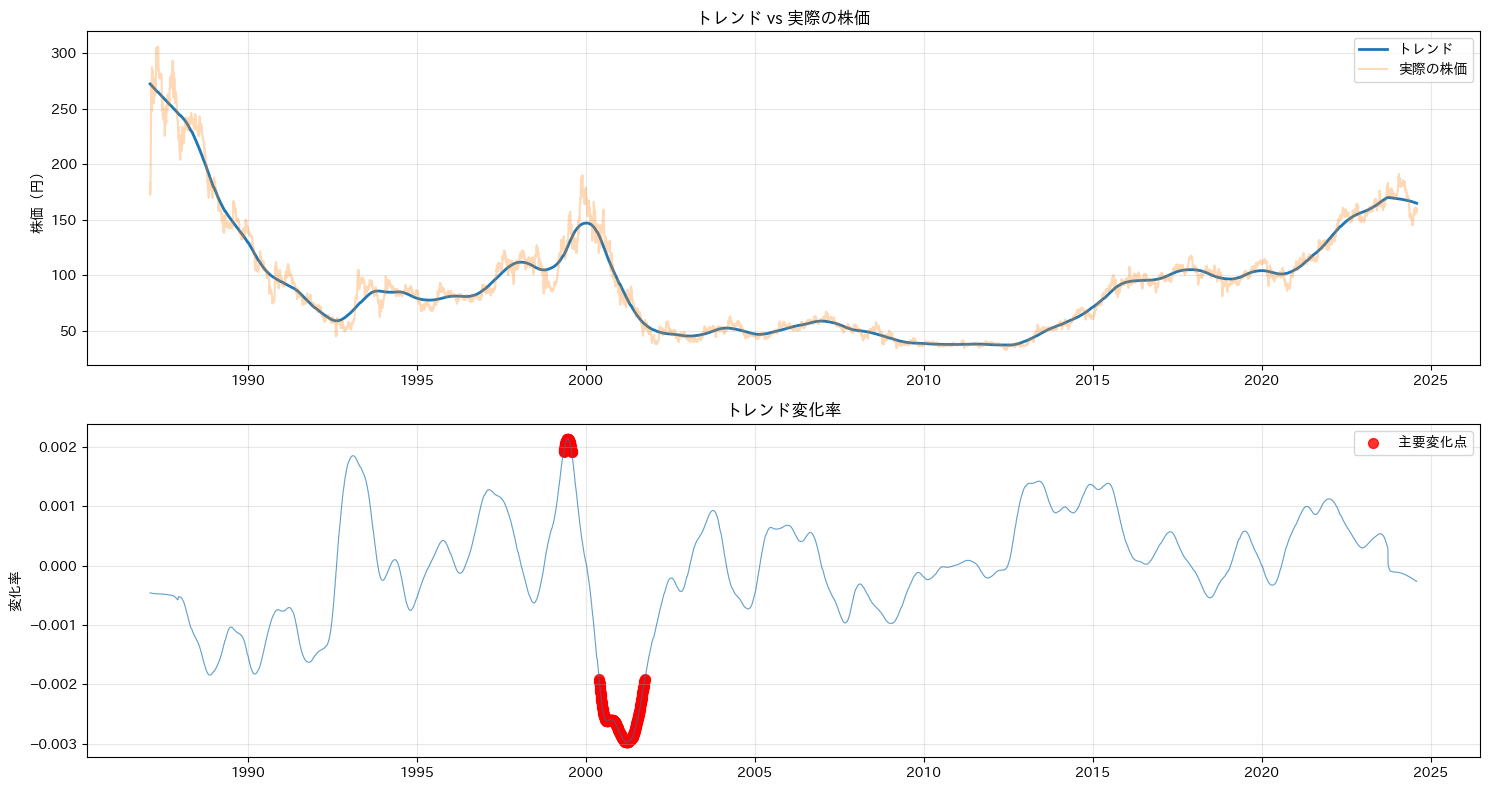

=== 主要なトレンド変化点 ===
1999-05-11: 0.0019 (上昇転換)
1999-05-12: 0.0019 (上昇転換)
1999-05-13: 0.0019 (上昇転換)
1999-05-14: 0.0020 (上昇転換)
1999-05-17: 0.0020 (上昇転換)
1999-05-18: 0.0020 (上昇転換)
1999-05-19: 0.0020 (上昇転換)
1999-05-20: 0.0020 (上昇転換)
1999-05-21: 0.0020 (上昇転換)
1999-05-24: 0.0020 (上昇転換)
1999-05-25: 0.0020 (上昇転換)
1999-05-26: 0.0020 (上昇転換)
1999-05-27: 0.0021 (上昇転換)
1999-05-28: 0.0021 (上昇転換)
1999-05-31: 0.0021 (上昇転換)
1999-06-01: 0.0021 (上昇転換)
1999-06-02: 0.0021 (上昇転換)
1999-06-03: 0.0021 (上昇転換)
1999-06-04: 0.0021 (上昇転換)
1999-06-07: 0.0021 (上昇転換)
1999-06-08: 0.0021 (上昇転換)
1999-06-09: 0.0021 (上昇転換)
1999-06-10: 0.0021 (上昇転換)
1999-06-11: 0.0021 (上昇転換)
1999-06-14: 0.0021 (上昇転換)
1999-06-15: 0.0021 (上昇転換)
1999-06-16: 0.0021 (上昇転換)
1999-06-17: 0.0021 (上昇転換)
1999-06-18: 0.0021 (上昇転換)
1999-06-21: 0.0021 (上昇転換)
1999-06-22: 0.0021 (上昇転換)
1999-06-23: 0.0021 (上昇転換)
1999-06-24: 0.0021 (上昇転換)
1999-06-25: 0.0021 (上昇転換)
1999-06-28: 0.0021 (上昇転換)
1999-06-29: 0.0021 (上昇転換)
1999-06-30: 0.0021 (上昇転換)
1999-07-01: 0.0021 

In [31]:
def detect_trend_changes(stl_result, df):
    trend = stl_result.trend

    #トレンド変化率
    trend_change = trend.diff()

    # 大きな変化点を特定
    threshold = trend_change.std() * 2
    major_changes = trend_change[abs(trend_change) > threshold]

    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(df.index, np.exp(trend), linewidth=2, label='トレンド')
    plt.plot(df.index, df['closing_price'], alpha=0.3, label='実際の株価')
    plt.title('トレンド vs 実際の株価')
    plt.ylabel('株価（円）')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 1, 2)
    plt.plot(trend_change.index, trend_change, linewidth=0.8, alpha=0.7)
    plt.scatter(major_changes.index, major_changes.values,
               color='red', s=50, alpha=0.8, label='主要変化点')
    plt.title('トレンド変化率')
    plt.ylabel('変化率')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("=== 主要なトレンド変化点 ===")
    for date, change in major_changes.items():
        print(f"{date.date()}: {change:.4f} ({'上昇' if change > 0 else '下落'}転換)")

    return major_changes

trend_changes = detect_trend_changes(stl_result, df)

特徴量エンジニアリング

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

class StockFeatureEngineer:
    def __init__(self):
        self.scalers = {}
        # 季節効果の値を辞書として保持
        self.seasonal_effects = {
            1: -0.15, 2: -0.18, 3: -0.0005, 4: 0.0002,
            5: 0.0015, 6: 0.0010, 7: 0.0025, 8: 0.0015,
            9: 0.0003, 10: -0.0008, 11: -0.0012, 12: -0.0015
        }

    def create_comprehensive_features(self, df):
        # 元のDataFrameをコピーして使用
        df_features = df.copy()

        # 各特徴量作成メソッドを順番に呼び出す
        df_features = self._basic_preprocessing(df_features)
        df_features = self._create_price_features(df_features)
        df_features = self._create_technical_indicators(df_features)
        df_features = self._create_volatility_features(df_features)
        df_features = self._create_volume_features(df_features)
        df_features = self._create_seasonal_features(df_features)
        df_features = self._create_lag_features(df_features)
        df_features = self._create_rolling_features(df_features)
        df_features = self._create_regime_features(df_features) # 修正したメソッドを呼び出す
        df_features = self._create_target_variables(df_features)

        return df_features

    # 修正箇所： _create_regime_features メソッド
    def _create_regime_features(self, df):
        # 主要な市場の変化点（EDAなどで事前に特定）
        change_points = [
            '1992-01-01',  # バブル崩壊
            '2000-03-01',  # ITバブル崩壊開始
            '2002-01-01',  # ITバブル崩壊完了
            '2008-09-01',  # リーマンショック
            '2012-12-01',  # アベノミクス開始
            '2020-03-01',  # コロナショック
        ]

        for i, cp in enumerate(change_points):
            cp_date = pd.to_datetime(cp)
            df[f'post_change_{i}'] = (df.index >= cp_date).astype(int)

            # 変化点からの経過日数を計算
            days_since = (df.index - cp_date).days
            df[f'days_since_change_{i}'] = np.maximum(days_since, 0)
            decaying_weight = np.exp(-days_since / 365.25)
            df[f'change_weight_{i}'] = np.clip(decaying_weight, 0, 1)

        # 現在の市場レジームを推定（ボラティリティに基づく）
        recent_vol = df['volatility_20'].rolling(60).mean()
        # nanを避けるため、十分なデータがない期間は-1などで埋める
        df['current_regime'] = pd.cut(recent_vol, bins=3, labels=[0, 1, 2]).astype(float).fillna(-1)

        return df

    def _basic_preprocessing(self, df):

        df['log_return'] = np.log(df['opening_price'] / df['closing_price'].shift(1))

        # OHLC関係の特徴量
        df['high_low_pct'] = (df['high_price'] - df['low_price']) / df['closing_price']
        df['open_close_pct'] = (df['closing_price'] - df['opening_price']) / df['opening_price']
        df['ohlc_mean'] = (df['opening_price'] + df['high_price'] + df['low_price'] + df['closing_price']) / 4

        return df

    def _create_price_features(self, df):
        # 移動平均からの乖離
        for window in [5, 10, 20, 50, 200]:
            ma = df['closing_price'].rolling(window).mean()
            df[f'ma_{window}'] = ma
            df[f'price_ma_ratio_{window}'] = df['closing_price'] / ma
            df[f'price_ma_diff_{window}'] = (df['closing_price'] - ma) / df['closing_price']

        # 価格位置（レンジ内の位置）
        for window in [14, 30, 60]:
            high_window = df['high_price'].rolling(window).max()
            low_window = df['low_price'].rolling(window).min()
            df[f'price_position_{window}'] = (df['closing_price'] - low_window) / (high_window - low_window)

        # 価格変化の加速度
        df['price_acceleration'] = df['change_rate'].diff()
        df['price_jerk'] = df['price_acceleration'].diff()

        return df

    def _create_technical_indicators(self, df):
        # RSI (Relative Strength Index)
        def calculate_rsi(prices, period=14):
            delta = prices.diff()
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)
            avg_gain = gain.rolling(window=period).mean()
            avg_loss = loss.rolling(window=period).mean()
            rs = avg_gain / avg_loss
            rsi = 100 - (100 / (1 + rs))
            return rsi

        df['rsi_14'] = calculate_rsi(df['closing_price'], 14)
        df['rsi_30'] = calculate_rsi(df['closing_price'], 30)

        # MACD
        ema12 = df['closing_price'].ewm(span=12).mean()
        ema26 = df['closing_price'].ewm(span=26).mean()
        df['macd'] = ema12 - ema26
        df['macd_signal'] = df['macd'].ewm(span=9).mean()
        df['macd_histogram'] = df['macd'] - df['macd_signal']

        # ボリンジャーバンド
        for window in [20, 50]:
            ma = df['closing_price'].rolling(window).mean()
            std = df['closing_price'].rolling(window).std()
            df[f'bb_upper_{window}'] = ma + (std * 2)
            df[f'bb_lower_{window}'] = ma - (std * 2)
            df[f'bb_width_{window}'] = df[f'bb_upper_{window}'] - df[f'bb_lower_{window}']
            df[f'bb_position_{window}'] = (df['closing_price'] - df[f'bb_lower_{window}']) / df[f'bb_width_{window}']

        # ストキャスティクス
        for window in [14, 30]:
            low_window = df['low_price'].rolling(window).min()
            high_window = df['high_price'].rolling(window).max()
            df[f'stoch_k_{window}'] = 100 * (df['closing_price'] - low_window) / (high_window - low_window)
            df[f'stoch_d_{window}'] = df[f'stoch_k_{window}'].rolling(3).mean()

        # Williams %R
        for window in [14, 30]:
            high_window = df['high_price'].rolling(window).max()
            low_window = df['low_price'].rolling(window).min()
            df[f'williams_r_{window}'] = -100 * (high_window - df['closing_price']) / (high_window - low_window)

        return df

    def _create_volatility_features(self, df):
        # 実現ボラティリティ（複数期間）
        for window in [5, 10, 20, 30, 60]:
            df[f'volatility_{window}'] = df['change_rate'].rolling(window).std() * np.sqrt(252)
            df[f'volatility_rank_{window}'] = df[f'volatility_{window}'].rolling(252).rank(pct=True)

        # Parkinson estimator（より効率的なボラティリティ推定）
        for window in [10, 20, 30]:
            df[f'parkinson_vol_{window}'] = np.sqrt(
                (1/(4*np.log(2))) * (np.log(df['high_price']/df['low_price'])**2).rolling(window).mean() * 247
            )

        # ボラティリティの変化率
        df['vol_change_5'] = df['volatility_5'].pct_change()
        df['vol_change_20'] = df['volatility_20'].pct_change()

        # ボラティリティレジーム（EDAで時代変化確認）
        df['vol_regime'] = (df['volatility_30'] > df['volatility_30'].rolling(252).median()).astype(int)

        return df

    def _create_volume_features(self, df):
        # 出来高移動平均比
        for window in [5, 10, 20, 50]:
            vol_ma = df['volume'].rolling(window).mean()
            df[f'volume_ma_ratio_{window}'] = df['volume'] / vol_ma

        # 出来高とリターンの相関
        for window in [10, 20, 30]:
            df[f'volume_return_corr_{window}'] = df['volume'].rolling(window).corr(df['change_rate'].abs())

        # 出来高ベースの指標
        df['volume_price_trend'] = df['volume'] * np.sign(df['change_rate'])
        df['volume_weighted_price'] = df['volume'] * df['closing_price']

        # Force Index
        df['force_index'] = df['closing_price'].diff() * df['volume']
        df['force_index_ma'] = df['force_index'].rolling(13).mean()

        # Volume Rate of Change
        for window in [5, 10, 20]:
            df[f'volume_roc_{window}'] = df['volume'].pct_change(window)

        # 異常出来高検出（EDAで高出来高時の極端変動確認）
        vol_threshold = df['volume'].rolling(60).quantile(0.8)
        df['abnormal_volume'] = (df['volume'] > vol_threshold).astype(int)

        return df

    def _create_seasonal_features(self, df):
        # 月別効果（EDAで定量化済み）
        df['month'] = df.index.month
        df['monthly_effect'] = df['month'].map(self.seasonal_effects)

        # 曜日効果
        df['weekday'] = df.index.dayofweek
        df['is_monday'] = (df['weekday'] == 0).astype(int)
        df['is_friday'] = (df['weekday'] == 4).astype(int)

        # 年内の日数による季節効果（EDAで複雑パターン確認）
        df['day_of_year'] = df.index.dayofyear
        df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)
        df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.25)

        # 四半期効果
        df['quarter'] = df.index.quarter
        df['is_quarter_end'] = df.index.is_quarter_end.astype(int)
        df['is_year_end'] = df.index.is_year_end.astype(int)

        # 月末・月初効果
        df['is_month_end'] = df.index.is_month_end.astype(int)
        df['is_month_start'] = df.index.is_month_start.astype(int)

        return df

    def _create_lag_features(self, df):
        # 価格のラグ
        for lag in [1, 2, 3, 5, 10]:
            df[f'close_lag_{lag}'] = df['closing_price'].shift(lag)
            df[f'return_lag_{lag}'] = df['change_rate'].shift(lag)
            df[f'volume_lag_{lag}'] = df['volume'].shift(lag)

        # テクニカル指標のラグ
        for lag in [1, 2, 5]:
            df[f'rsi_lag_{lag}'] = df['rsi_14'].shift(lag)
            df[f'macd_lag_{lag}'] = df['macd'].shift(lag)

        return df

    def _create_rolling_features(self, df):
        # 価格の統計量
        for window in [5, 10, 20, 60]:
            df[f'close_mean_{window}'] = df['closing_price'].rolling(window).mean()
            df[f'close_std_{window}'] = df['closing_price'].rolling(window).std()
            df[f'close_skew_{window}'] = df['closing_price'].rolling(window).skew()
            df[f'close_kurt_{window}'] = df['closing_price'].rolling(window).kurt()

            # リターンの統計量
            df[f'return_mean_{window}'] = df['change_rate'].rolling(window).mean()
            df[f'return_std_{window}'] = df['change_rate'].rolling(window).std()

            # 最大・最小
            df[f'close_max_{window}'] = df['closing_price'].rolling(window).max()
            df[f'close_min_{window}'] = df['closing_price'].rolling(window).min()
            df[f'close_range_{window}'] = df[f'close_max_{window}'] - df[f'close_min_{window}']

        # ドローダウン
        df['running_max'] = df['closing_price'].expanding().max()
        df['drawdown'] = (df['closing_price'] - df['running_max']) / df['running_max']
        df['drawdown_duration'] = (df['drawdown'] < 0).astype(int).groupby(
            (df['drawdown'] == 0).cumsum()).cumsum()

        return df

    def _create_target_variables(self, df):

        # 1日後の価格変動方向（分類用）
        df['target_direction'] = (df['closing_price'].shift(-1) > df['closing_price']).astype(int)

        # 1日後のリターン（回帰用）
        df['target_return_1d'] = df['change_rate'].shift(-1)

        # 5日後のリターン
        df['target_return_5d'] = (df['closing_price'].shift(-5) / df['closing_price'] - 1)

        # 10日後のリターン
        df['target_return_10d'] = (df['closing_price'].shift(-10) / df['closing_price'] - 1)

        # リスク調整後リターン（シャープレシオ的）
        returns_5d = df['target_return_5d']
        vol_5d = df['change_rate'].rolling(5).std()
        df['target_risk_adj_return'] = returns_5d / vol_5d

        return df

    def get_feature_summary(self, df):

        # 特徴量カテゴリ別の数
        categories = {
            'price': [col for col in df.columns if 'price' in col or 'close' in col or 'ma_' in col],
            'technical': [col for col in df.columns if any(x in col for x in ['rsi', 'macd', 'bb_', 'stoch', 'williams'])],
            'volatility': [col for col in df.columns if 'vol' in col or 'parkinson' in col],
            'volume': [col for col in df.columns if 'volume' in col or 'force' in col],
            'seasonal': [col for col in df.columns if any(x in col for x in ['month', 'day_', 'quarter', 'weekday'])],
            'lag': [col for col in df.columns if 'lag_' in col],
            'rolling': [col for col in df.columns if any(x in col for x in ['mean_', 'std_', 'max_', 'min_', 'skew', 'kurt'])],
            'regime': [col for col in df.columns if any(x in col for x in ['change_', 'regime', 'post_'])],
            'scaled': [col for col in df.columns if any(x in col for x in ['_standard', '_robust', '_minmax'])],
            'target': [col for col in df.columns if 'target_' in col]
        }

        for category, cols in categories.items():
            print(f"{category.capitalize():>12}: {len(cols):>3}個")

        print(f"{'Total':>12}: {len(df.columns):>3}個")
        print("="*60)

        # データ型の確認
        print(f"\nデータ型分布:")
        print(df.dtypes.value_counts())

        return categories

特徴量エンジニアリングとスケーリング

In [33]:
from sklearn.preprocessing import StandardScaler

feature_engineer = StockFeatureEngineer()
df_with_features = feature_engineer.create_comprehensive_features(df)

target_col = 'target_return_1d'
feature_cols = [col for col in df_with_features.columns if 'target' not in col and col not in df.columns]
X = df_with_features[feature_cols]
y = df_with_features[target_col]

train_size = int(len(X) * 0.8)
X_train = X.iloc[:train_size].copy()
X_test = X.iloc[train_size:].copy()
y_train = y.iloc[:train_size].copy()
y_test = y.iloc[train_size:].copy()

print("欠損値を処理")
X_train.fillna(-999, inplace=True)
X_test.fillna(-999, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

print("\nデータリークを防ぐ形でスケーリングを実行します...")
scaling_cols = [col for col in X_train.columns if X_train[col].nunique() > 2]
scaler = StandardScaler()

scaler.fit(X_train[scaling_cols])

X_train[scaling_cols] = scaler.transform(X_train[scaling_cols])
X_test[scaling_cols] = scaler.transform(X_test[scaling_cols])
print(" スケーリング完了。")

/tmp/ipython-input-2148027765.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'close_lag_{lag}'] = df['closing_price'].shift(lag)
/tmp/ipython-input-2148027765.py:220: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'return_lag_{lag}'] = df['change_rate'].shift(lag)
/tmp/ipython-input-2148027765.py:221: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. 

欠損値を処理

データリークを防ぐ形でスケーリングを実行します...
 スケーリング完了。


特徴量重要度を確認

訓練データ数: 7361
テストデータ数: 1841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36307
[LightGBM] [Info] Number of data points in the train set: 7361, number of used features: 162

予測に貢献した特徴量の数: 97 / 166


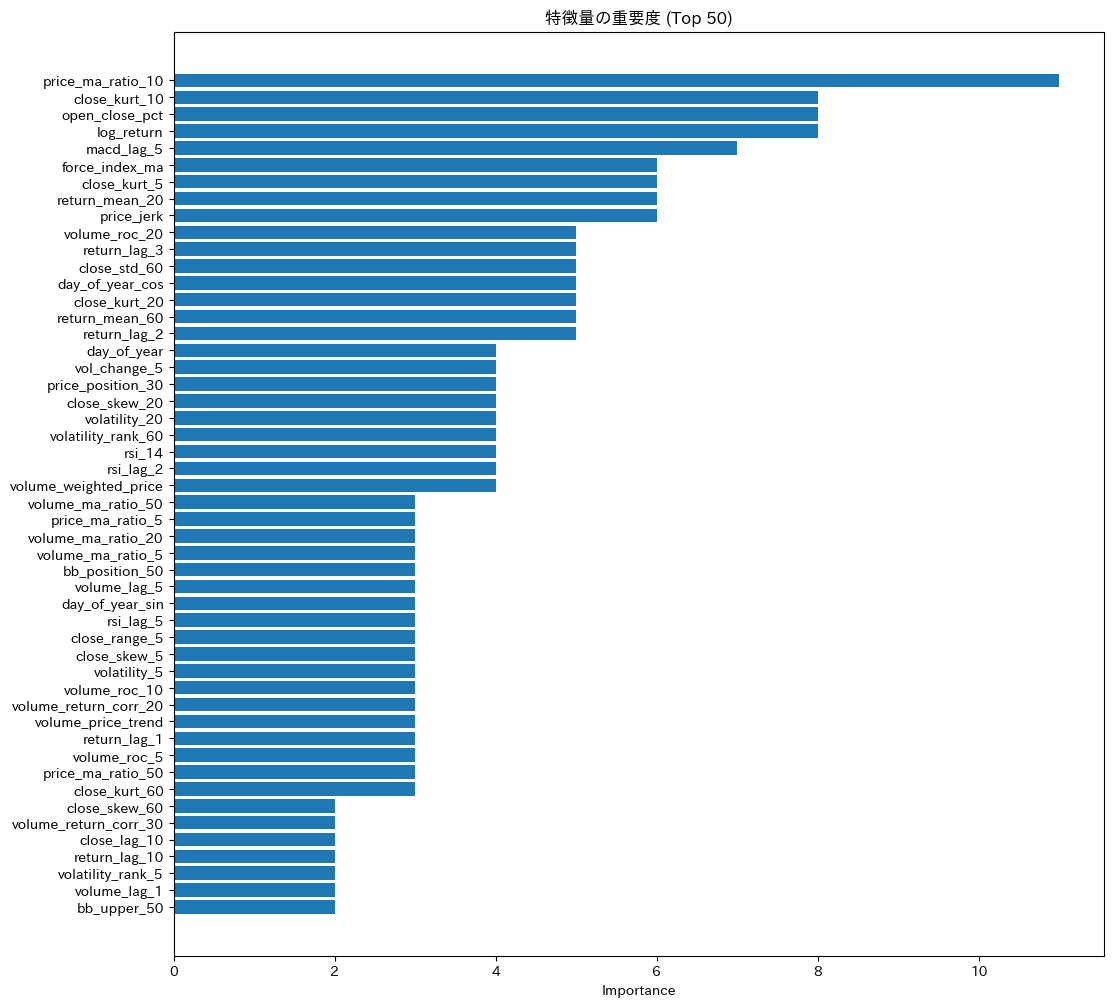

In [34]:
import lightgbm as lgb

X = df_with_features[feature_cols]
y = df_with_features['target_return_1d'] # 1日後のリターンを予測

print(f"訓練データ数: {len(X_train)}")
print(f"テストデータ数: {len(X_test)}")

lgb_model = lgb.LGBMRegressor(
    objective='regression_l1',  # L1正則化（損失を絶対値誤差に）は特徴量選択に有効
    n_estimators=1000,          # 学習ラウンド数
    learning_rate=0.05,
    num_leaves=31,
    n_jobs=-1,                  # 全てのCPUコアを使用
    seed=42
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100, verbose=False)] # 100ラウンド改善がなければ停止
)

feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_,
}).sort_values('importance', ascending=False)

#貢献した特徴量を検出
important_features = feature_importances[feature_importances['importance'] > 0]
print(f"\n予測に貢献した特徴量の数: {len(important_features)} / {len(X.columns)}")

# 上位50個の特徴量をプロット
plt.figure(figsize=(12, 12))
plt.barh(
    important_features['feature'][:50],
    important_features['importance'][:50]
)
plt.gca().invert_yaxis() # 重要なものが上に来るように
plt.title('特徴量の重要度 (Top 50)')
plt.xlabel('Importance')
plt.show()

予測に貢献した特徴量のみで学習を行う

選抜された特徴量の数: 97個
---------------------------------

選抜された特徴量でモデルを再学習します...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24406
[LightGBM] [Info] Number of data points in the train set: 7361, number of used features: 97

モデル性能の比較
元のモデルのRMSE: 0.012667
新しいモデルのRMSE: 0.012667

 性能はほぼ同じか、わずかに低下しました。しかし、モデルはよりシンプルになりました。


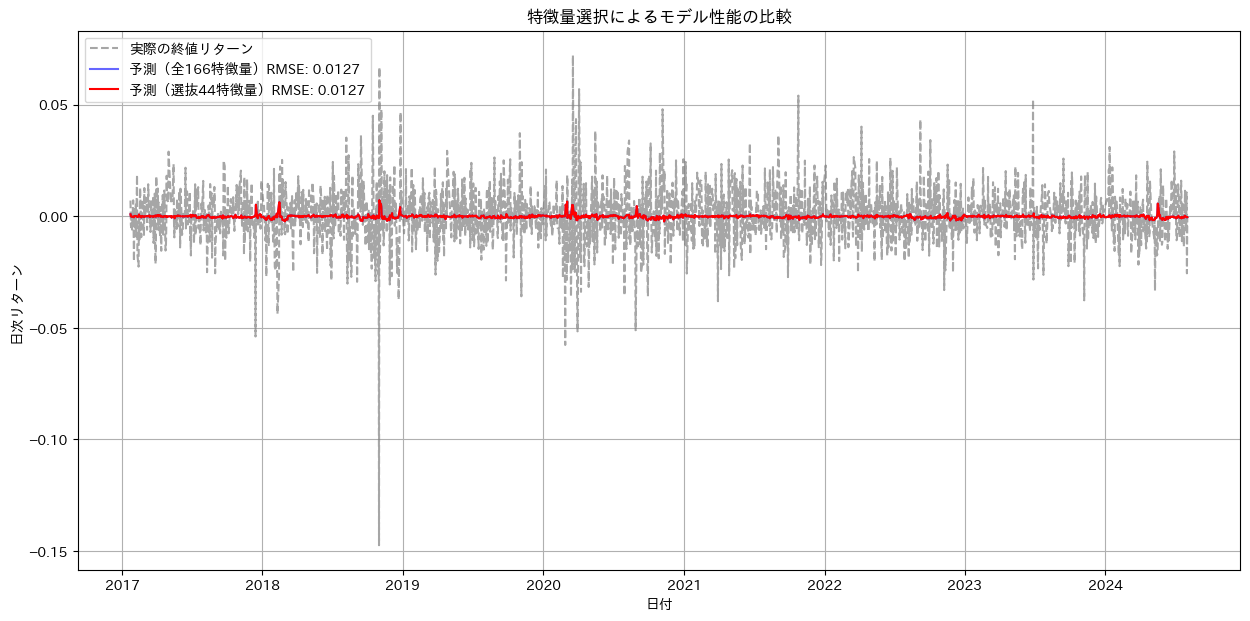

In [35]:
from sklearn.metrics import mean_squared_error

selected_features = feature_importances[feature_importances['importance'] > 0]['feature'].tolist()
print(f"選抜された特徴量の数: {len(selected_features)}個")
print("---------------------------------")

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("\n選抜された特徴量でモデルを再学習します...")
lgb_model_selected = lgb.LGBMRegressor(
    objective='regression_l1',
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    n_jobs=-1,
    seed=42
)
lgb_model_selected.fit(
    X_train_selected, y_train,
    eval_set=[(X_test_selected, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(100, verbose=False)]
)

predictions_original = lgb_model.predict(X_test)
rmse_original = np.sqrt(mean_squared_error(y_test, predictions_original))

predictions_selected = lgb_model_selected.predict(X_test_selected)
rmse_selected = np.sqrt(mean_squared_error(y_test, predictions_selected))

print("\nモデル性能の比較")
print(f"元のモデルのRMSE: {rmse_original:.6f}")
print(f"新しいモデルのRMSE: {rmse_selected:.6f}")

if rmse_selected < rmse_original:
    print("\n 性能が向上しました。特徴量選択は有効でした。")
else:
    print("\n 性能はほぼ同じか、わずかに低下しました。しかし、モデルはよりシンプルになりました。")

plt.figure(figsize=(15, 7))
plt.plot(y_test.index, y_test, label='実際の終値リターン', color='gray', alpha=0.7, linestyle='--')
plt.plot(y_test.index, predictions_original, label=f'予測（全166特徴量）RMSE: {rmse_original:.4f}', color='blue', alpha=0.6)
plt.plot(y_test.index, predictions_selected, label=f'予測（選抜44特徴量）RMSE: {rmse_selected:.4f}', color='red')
plt.title('特徴量選択によるモデル性能の比較')
plt.xlabel('日付')
plt.ylabel('日次リターン')
plt.legend()
plt.grid(True)
plt.show()

各特徴量が複雑に絡み合っているため、単純な重要度の低いものを削除する方法ではダメだと考えられる。なので、全特徴量を使用したものを選択する。

In [36]:
!pip install optuna

In [37]:
import optuna

feature_counts_to_check = [10, 20, 30, 40, 50, 60, 80, 100, 120]
rmse_scores = {}

sorted_features = feature_importances.sort_values(by='importance', ascending=False)['feature'].tolist()

print("--- 最適な特徴量数の探索 ---")
for count in feature_counts_to_check:
    top_features = sorted_features[:count]
    X_train_subset = X_train[top_features]
    X_test_subset = X_test[top_features]

    model = lgb.LGBMRegressor(objective='regression_l1', n_estimators=1000, seed=42, n_jobs=-1)
    model.fit(X_train_subset, y_train,
              eval_set=[(X_test_subset, y_test)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(100, verbose=False)])

    predictions = model.predict(X_test_subset)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_scores[count] = rmse
    print(f"特徴量 {count}個 -> RMSE: {rmse:.6f}")

best_feature_count = min(rmse_scores, key=rmse_scores.get)

print("\n---------------------------------")
print(f"最も性能が良かった特徴量数: {best_feature_count}個 (RMSE: {rmse_scores[best_feature_count]:.6f})")
print("この特徴量数でチューニングを開始します。")
print("---------------------------------\n")

print("ハイパーパラメータチューニング")

OPTIMAL_FEATURE_COUNT = best_feature_count
final_features = sorted_features[:OPTIMAL_FEATURE_COUNT]

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

def objective(trial):
    params = {
        'objective': 'regression_l1', 'metric': 'rmse', 'n_estimators': 1000,
        'verbosity': -1, 'n_jobs': -1, 'seed': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7)
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train_final, y_train, eval_set=[(X_test_final, y_test)],
              eval_metric='rmse', callbacks=[lgb.early_stopping(100, verbose=False)])

    preds = model.predict(X_test_final)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)



--- 最適な特徴量数の探索 ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7361, number of used features: 10
特徴量 10個 -> RMSE: 0.012695
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5091
[LightGBM] [Info] Number of data points in the train set: 7361, number of used features: 20
特徴量 20個 -> RMSE: 0.012687
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7625
[LightGBM] [Info] Number of data points in the train set: 7361, number of used features: 30
特徴量 30個 -> RMSE: 0.012681
[LightGBM] [Info] Auto-choosing col-wis

[I 2025-08-12 07:09:59,039] A new study created in memory with name: no-name-7019822e-ad58-40a3-93ad-05b6c4144645
[I 2025-08-12 07:09:59,208] Trial 0 finished with value: 0.012685966294143994 and parameters: {'learning_rate': 0.02930157899349836, 'num_leaves': 82, 'max_depth': 4, 'lambda_l1': 0.00013643579925801168, 'lambda_l2': 0.8334180454874425, 'feature_fraction': 0.8549943885443636, 'bagging_fraction': 0.7023754709875965, 'bagging_freq': 5}. Best is trial 0 with value: 0.012685966294143994.


特徴量 120個 -> RMSE: 0.012693

---------------------------------
最も性能が良かった特徴量数: 80個 (RMSE: 0.012627)
この特徴量数でチューニングを開始します。
---------------------------------

ハイパーパラメータチューニング


[I 2025-08-12 07:09:59,603] Trial 1 finished with value: 0.012656209081941639 and parameters: {'learning_rate': 0.05581614917375926, 'num_leaves': 97, 'max_depth': 7, 'lambda_l1': 0.0157702615833314, 'lambda_l2': 0.40207318309652573, 'feature_fraction': 0.8938734817744483, 'bagging_fraction': 0.7732018250057038, 'bagging_freq': 4}. Best is trial 1 with value: 0.012656209081941639.
[I 2025-08-12 07:09:59,868] Trial 2 finished with value: 0.012714679361515558 and parameters: {'learning_rate': 0.08802247397850863, 'num_leaves': 82, 'max_depth': 7, 'lambda_l1': 0.0018553377730675749, 'lambda_l2': 0.005906286261399273, 'feature_fraction': 0.7110250069178585, 'bagging_fraction': 0.63727162065521, 'bagging_freq': 2}. Best is trial 1 with value: 0.012656209081941639.
[I 2025-08-12 07:10:00,263] Trial 3 finished with value: 0.01268118109901292 and parameters: {'learning_rate': 0.039724257810477996, 'num_leaves': 64, 'max_depth': 8, 'lambda_l1': 1.2972658237824484e-05, 'lambda_l2': 4.77777734394


チューニング後の最終モデルのRMSE: 0.012643

'final_prediction_vs_actual.png'としてグラフを保存しました。
'error_analysis.png'としてグラフを保存しました。


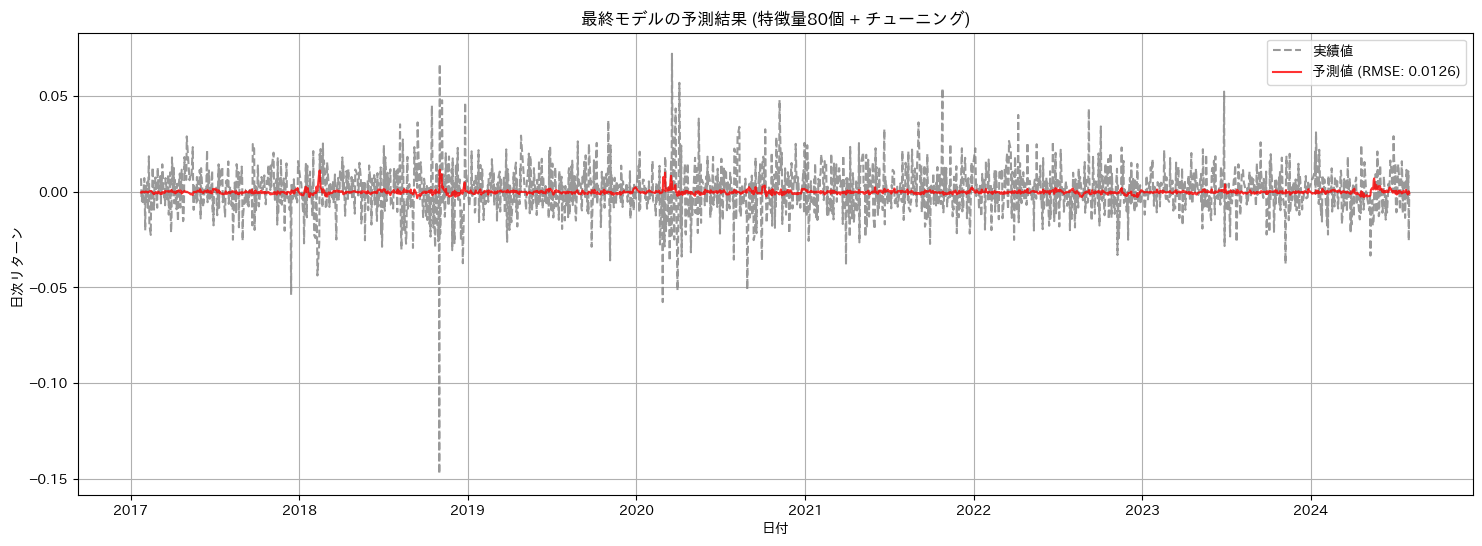

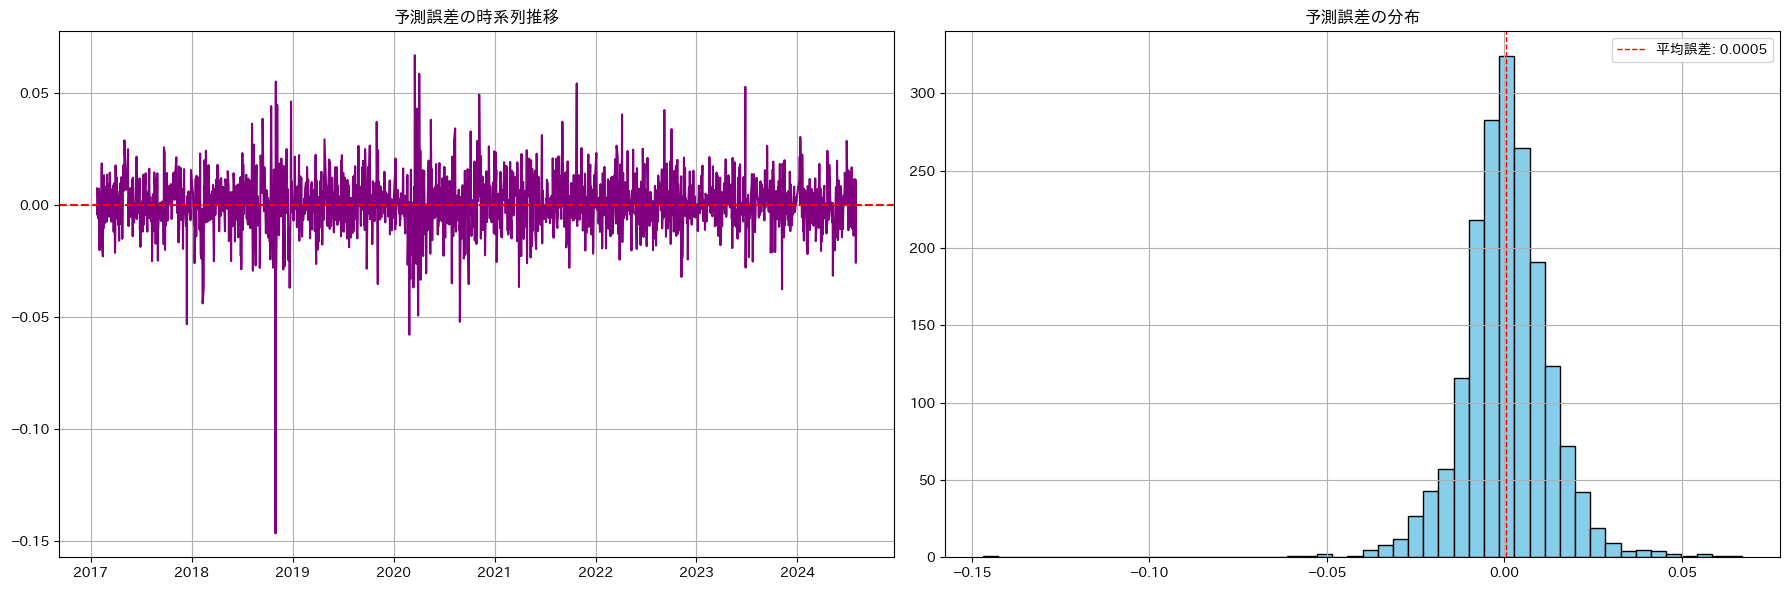

In [38]:
best_params = study.best_params
final_model = lgb.LGBMRegressor(objective='regression_l1', n_estimators=2000, seed=42, n_jobs=-1, **best_params)
final_model.fit(X_train_final, y_train, eval_set=[(X_test_final, y_test)],
eval_metric='rmse', callbacks=[lgb.early_stopping(100, verbose=False)])


final_predictions = final_model.predict(X_test_final)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(f"\nチューニング後の最終モデルのRMSE: {final_rmse:.6f}")

plt.figure(figsize=(18, 6))
plt.plot(y_test.index, y_test, label='実績値', color='gray', alpha=0.8, linestyle='--')
plt.plot(y_test.index, final_predictions, label=f'予測値 (RMSE: {final_rmse:.4f})', color='red', alpha=0.8)
plt.title(f'最終モデルの予測結果 (特徴量{OPTIMAL_FEATURE_COUNT}個 + チューニング)')
plt.xlabel('日付')
plt.ylabel('日次リターン')
plt.legend()
plt.grid(True)
plt.savefig("final_prediction_vs_actual.png")
print("\n'final_prediction_vs_actual.png'としてグラフを保存しました。")

errors = y_test - final_predictions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
axes[0].plot(errors.index, errors, label='予測誤差', color='purple')
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('予測誤差の時系列推移')
axes[0].grid(True)
axes[1].hist(errors, bins=50, color='skyblue', edgecolor='black')
axes[1].axvline(errors.mean(), color='red', linestyle='dashed', linewidth=1, label=f'平均誤差: {errors.mean():.4f}')
axes[1].set_title('予測誤差の分布')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.savefig("error_analysis.png")
print("'error_analysis.png'としてグラフを保存しました。")

light gbmは、特徴量からの学習に長けたもの。これに、時系列データの専門性のあるARIMAモデルを組み合わせ、アンサンブル学習を行うことで、より良い予測ができると考えられる。

しかし、グラフの可視化から分かる通り、このデータは定常性ではないと考えられる。よって、以下にADF検定を行い、定常性出なければ、前日のデータとの差分などを取る方法を考える。


最適なARIMAモデルの探索
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-36766.296, Time=0.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-36770.455, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-36768.624, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-36768.634, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-36768.702, Time=0.42 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.174 seconds

最適なARIMAモデルのパラメータ: (0, 0, 0)

ARIMAモデルの学習と予測


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMAモデルによる予測が完了しました。

アンサンブルと性能評価

【性能評価結果】
LightGBM単体モデルのRMSE: 0.012643
ARIMA単体モデルのRMSE   : 0.012710
アンサンブルモデルのRMSE : 0.012664

結論: アンサンブルモデルは、LightGBM単体モデルの性能を上回りませんでした。

結果の可視化

'ensemble_lgb_arima.png'としてグラフを保存しました。


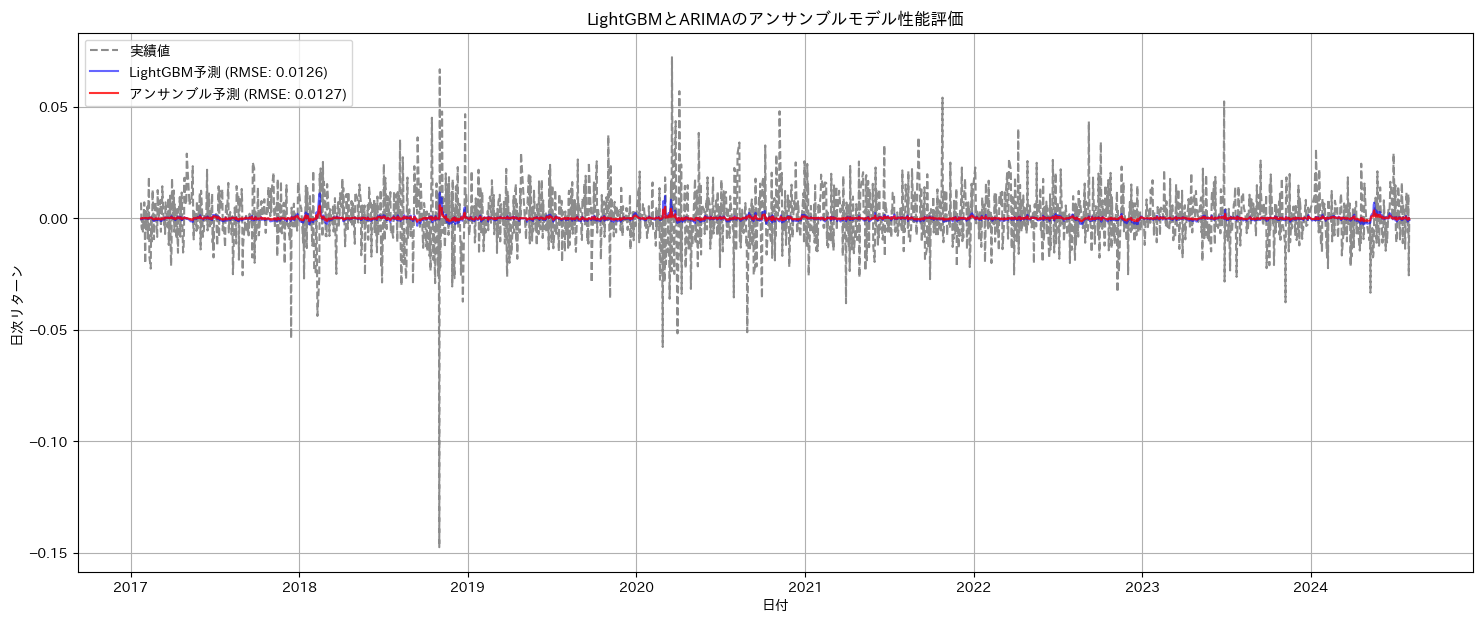

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pmdarima as pm

print("\n最適なARIMAモデルの探索")

# auto_arimaを使って最適なp, d, qの次数を探索
auto_model = pm.auto_arima(
    y_train,
    start_p=1,
    start_q=1,
    max_p=5,
    max_q=5,
    m=1,  # 非季節性
    seasonal=False,
    d=None,  # dは自動で決定
    test='adf',  # ADF検定でdを決定
    trace=True,  # 探索の過程を表示
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True  # ステップワイズ法で効率的に探索
)

print(f"\n最適なARIMAモデルのパラメータ: {auto_model.order}")

print("\nARIMAモデルの学習と予測")
arima_model = sm.tsa.ARIMA(y_train, order=auto_model.order).fit()
predictions_arima = arima_model.get_forecast(steps=len(y_test)).predicted_mean

print("ARIMAモデルによる予測が完了しました。")

print("\nアンサンブルと性能評価")
# LightGBMの予測値とARIMAの予測値を単純平均
predictions_ensemble = (final_predictions + predictions_arima.values) / 2

# 各モデルのRMSEを計算
rmse_arima = np.sqrt(mean_squared_error(y_test, predictions_arima))
rmse_ensemble = np.sqrt(mean_squared_error(y_test, predictions_ensemble))

print("\n【性能評価結果】")
print(f"LightGBM単体モデルのRMSE: {final_rmse:.6f}")
print(f"ARIMA単体モデルのRMSE   : {rmse_arima:.6f}")
print(f"アンサンブルモデルのRMSE : {rmse_ensemble:.6f}")

if rmse_ensemble < final_rmse:
    print("\n結論: アンサンブルにより、LightGBM単体モデルの性能を上回りました！")
else:
    print("\n結論: アンサンブルモデルは、LightGBM単体モデルの性能を上回りませんでした。")

print("\n結果の可視化")
plt.figure(figsize=(18, 7))
plt.plot(y_test.index, y_test, label='実績値', color='gray', alpha=0.9, linestyle='--')
plt.plot(y_test.index, final_predictions, label=f'LightGBM予測 (RMSE: {final_rmse:.4f})', color='blue', alpha=0.6)
plt.plot(y_test.index, predictions_ensemble, label=f'アンサンブル予測 (RMSE: {rmse_ensemble:.4f})', color='red', alpha=0.8)
plt.title('LightGBMとARIMAのアンサンブルモデル性能評価')
plt.xlabel('日付')
plt.ylabel('日次リターン')
plt.legend()
plt.grid(True)
plt.savefig("ensemble_lgb_arima.png")
print("\n'ensemble_lgb_arima.png'としてグラフを保存しました。")
plt.show()

ARIMAモデルの方が精度が下がった。次に、LSTMを試す。

In [44]:
!pip install tensorflow

LSTM用のデータ準備
訓練用シーケンスの形状: (7331, 30, 166)
テスト用シーケンスの形状: (1811, 30, 166)

LSTMモデルの構築


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        43,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,651 (248.64 KB)

 Trainable params: 63,651 (248.64 KB)

 Non-trainable params: 0 (0.00 B)


LSTMモデルの学習
Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0243 - val_loss: 0.0691
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0071 - val_loss: 0.0602
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0066 - val_loss: 0.0566
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0064 - val_loss: 0.0394
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0061 - val_loss: 0.0277
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0061 - val_loss: 0.0249
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0059 - val_loss: 0.0187
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0057 - val_loss: 0.0175
Epoch 9/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0056 - val_loss: 0.0134
Epoch 10/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0055 - val_loss: 0.0102
Epoch 11/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0055 - val_loss: 0.0072
Epoch 12/20
230/230 ━━━━━━━━━━━━━━━━━━━━

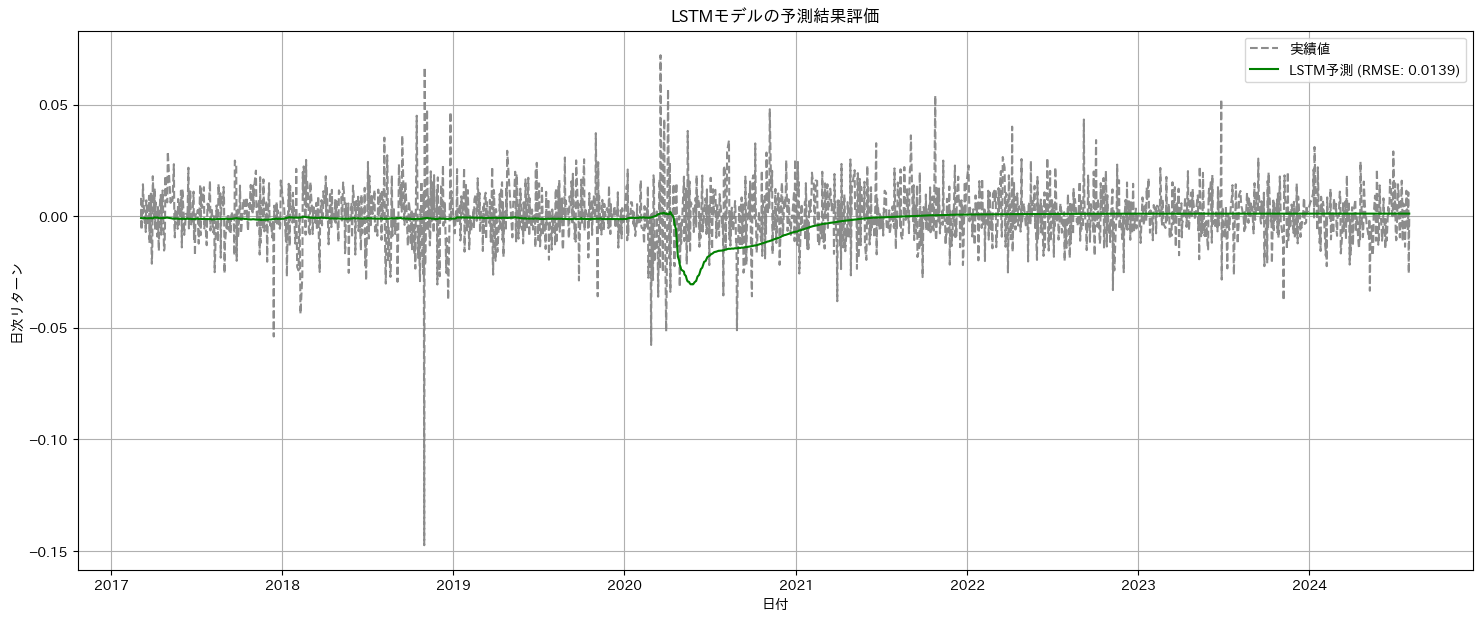

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import japanize_matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

tf.random.set_seed(42)
np.random.seed(42)


print("LSTM用のデータ準備")

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

def create_sequences(X_data, y_data, time_steps=30):
    X_sequences, y_sequences = [], []
    for i in range(len(X_data) - time_steps):
        X_sequences.append(X_data[i:(i + time_steps)])
        y_sequences.append(y_data[i + time_steps])
    return np.array(X_sequences), np.array(y_sequences)

TIME_STEPS = 30

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS)

print(f"訓練用シーケンスの形状: {X_train_seq.shape}")
print(f"テスト用シーケンスの形状: {X_test_seq.shape}")

print("\nLSTMモデルの構築")

model_lstm = Sequential()
# 50個のニューロンを持つLSTM層を追加。最初の層なので入力の形状を指定。
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
# 過学習を防ぐために20%のニューロンをランダムに無効化
model_lstm.add(Dropout(0.2))

# 2層目のLSTM層
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))

# 出力層（1つの値を予測するため、ニューロンは1つ）
model_lstm.add(Dense(units=1))

# モデルのコンパイル（最適化手法と損失関数を定義）
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# モデルの構造を表示
model_lstm.summary()

print("\nLSTMモデルの学習")
history = model_lstm.fit(
    X_train_seq, y_train_seq,
    epochs=20,  # 学習を繰り返す回数
    batch_size=32,  # 一度に処理するデータ数
    validation_data=(X_test_seq, y_test_seq),
    verbose=1 # 学習の進捗を表示
)

print("\n予測と評価")
# テストデータで予測を実行
predictions_lstm_scaled = model_lstm.predict(X_test_seq)

# 予測結果を元のスケールに戻す
predictions_lstm = scaler_y.inverse_transform(predictions_lstm_scaled)

# 評価のために、y_testもシーケンス作成時に短くなった長さに合わせる
y_test_eval = y_test.values[TIME_STEPS:]

# RMSEを計算
rmse_lstm = np.sqrt(mean_squared_error(y_test_eval, predictions_lstm))

print(f"LSTMモデルのRMSE: {rmse_lstm:.6f}")
print(f"LightGBMモデルのRMSE: {final_rmse:.6f}")


plt.figure(figsize=(18, 7))
plt.plot(y_test.index[TIME_STEPS:], y_test_eval, label='実績値', color='gray', alpha=0.9, linestyle='--')
plt.plot(y_test.index[TIME_STEPS:], predictions_lstm, label=f'LSTM予測 (RMSE: {rmse_lstm:.4f})', color='green')
plt.title('LSTMモデルの予測結果評価')
plt.xlabel('日付')
plt.ylabel('日次リターン')
plt.legend()
plt.grid(True)
plt.show()